<a href="https://colab.research.google.com/github/skeyttersha/ab-testing/blob/master/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Введение

В данном проекте представлены данные о **4-х компаниях**: Red, Black, Green, Blue. **Цель** - проанализировать данные с визуализацией и сформулировать выводы.

По компаниям предоставлены следующие **данные**:

• Hid - human_id, зашифрованный персональный идентификатор пользователя компаний

• has_company_id - наличие зарегистрированного аккаунта в компании

• company_gmv_total - суммарный gmv пользователя в сервисе

• company_gmv_order_count - количество успешных заказов пользователя в сервисе

• company_activity_count - количество активных действий пользователя в сервисе

• company_android - установленное у пользователя приложение компании на платформе android

• company_apple - установленное у пользователя приложение компании на платформе Apple

• company _web- установленное у пользователя приложение компании на ПК

• is_msk - территориальное расположение в Москве

По описанию данных можно сказать о том, что почти все из них имеют булевый тип, кроме Hid, который отражает индификатор пользователя и имеет тип object, остальные три столбца тоже имеют иной тип: company_gmv_total, company_gim_order_count, company_activity_count имеют числовой формат.

**1. Импортируем файл и изучаем общую информацию.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Analytic_test.xlsx')

In [ ]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
1,0.0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2.0,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Приведем данные к удобному формату: сформируем столбцы, чтобы они отражали суть данных, удалим ненужные .

In [ ]:
data = data.drop(data.columns[0], axis = 1)

In [ ]:
data.columns = data.iloc[0]

In [ ]:
data.drop(index=data.index[0], axis = 0, inplace = True)

In [ ]:
data

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
1,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,32555ec33d762588db3253b063525f03b58f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
99997,3255600b525b2598b37775fb3b25b3397bbb,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99998,325563dbbb35c393be38c5c79373ed180,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99999,3255650825570bcc93bc9b076b0bfbb25e6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 1 to 100000
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   HID                    100000 non-null  object
 1   active_Red             100000 non-null  object
 2   has_Green_id           100000 non-null  object
 3   has_Black_id           100000 non-null  object
 4   has_Blue_id            100000 non-null  object
 5   Blue_activity_count    100000 non-null  object
 6   Blue_gmv_total         99999 non-null   object
 7   Green_gvm_total        100000 non-null  object
 8   Green_gvm_order_count  100000 non-null  object
 9   Black_gvm_total        100000 non-null  object
 10  Black_gvm_order_count  100000 non-null  object
 11  Red_android            100000 non-null  object
 12  Green_android          100000 non-null  object
 13  Black_android          100000 non-null  object
 14  Blue_android           100000 non-null  object
 15  

In [ ]:
# Приведем к нужным типам данные.
for col in data.columns:
    if 'total' in str(col):
        data[col] = pd.to_numeric(data[col])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 1 to 100000
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HID                    100000 non-null  object 
 1   active_Red             100000 non-null  object 
 2   has_Green_id           100000 non-null  object 
 3   has_Black_id           100000 non-null  object 
 4   has_Blue_id            100000 non-null  object 
 5   Blue_activity_count    100000 non-null  object 
 6   Blue_gmv_total         99999 non-null   float64
 7   Green_gvm_total        100000 non-null  float64
 8   Green_gvm_order_count  100000 non-null  object 
 9   Black_gvm_total        100000 non-null  float64
 10  Black_gvm_order_count  100000 non-null  object 
 11  Red_android            100000 non-null  object 
 12  Green_android          100000 non-null  object 
 13  Black_android          100000 non-null  object 
 14  Blue_android           100000 non-nu

Все столбцы с total удалось перевести в числовой формат, чего не удается сделать с count. Значит, там есть данные, которые имеют другой формат, может, это выбросы. Решим эту задачу по ходу проекта.

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.columns

Index(['hid', 'active_red', 'has_green_id', 'has_black_id', 'has_blue_id',
       'blue_activity_count', 'blue_gmv_total', 'green_gvm_total',
       'green_gvm_order_count', 'black_gvm_total', 'black_gvm_order_count',
       'red_android', 'green_android', 'black_android', 'blue_android',
       'red_apple', 'green_apple', 'black_apple', 'blue_apple', 'is_msk',
       'red_web', 'green_web', 'black_web', 'blue_web'],
      dtype='object', name=0)

In [ ]:
data.isna().sum()

0
hid                      0
active_red               0
has_green_id             0
has_black_id             0
has_blue_id              0
blue_activity_count      0
blue_gmv_total           1
green_gvm_total          0
green_gvm_order_count    0
black_gvm_total          0
black_gvm_order_count    0
red_android              0
green_android            0
black_android            0
blue_android             0
red_apple                0
green_apple              0
black_apple              0
blue_apple               0
is_msk                   0
red_web                  0
green_web                0
black_web                0
blue_web                 0
dtype: int64

In [ ]:
# Проверим дубликаты.
data.duplicated().sum()

0

In [ ]:
data.hid.duplicated().sum()

0

После проверки на дубликаты по всем строкам, отдельно по id, мы видим, что данные не повторяются, кроме того есть всего 1 пропуск.

Создадим функцию для проверки целостности данных по каждой компании. Для каждой должно быть 7 столбцов, то есть:
    
• has_company_id - наличие зарегистрированного аккаунта в компании

• company_gmv_total - суммарный gmv пользователя в сервисе

• company_gim_order_count - количество успешных заказов пользователя в сервисе

• company_activity_count - количество активных действий пользователя в сервисе

• company_android - установленное у пользователя приложение компании на платформе android

• company_apple - установленное у пользователя приложение компании на платформе Apple

• company _web- установленное у пользователя приложение компании на ПК

In [ ]:
def company(name):
    for col in data.columns:
        if name in str(col):
            print(col)

In [ ]:
company('green')

has_green_id
green_gvm_total
green_gvm_order_count
green_android
green_apple
green_web


In [ ]:
company('red')

active_red
red_android
red_apple
red_web


In [ ]:
company('blue')

has_blue_id
blue_activity_count
blue_gmv_total
blue_android
blue_apple
blue_web


In [ ]:
company('black')

has_black_id
black_gvm_total
black_gvm_order_count
black_android
black_apple
black_web


Мы видим, что ни в одной из компаний нет всех данных,  кол-во столбцов - 6 в каждой компании, кроме Red, в ней всего 4 и название столбца active_Red явно нужно переименовать в Red_activity_count. Кроме того gmv в некоторых столбах написано с ошибкой. Исправим и этот дефект.

In [ ]:
data = data.rename(columns = {'active_red':'red_activity_count','black_gvm_total':'black_gmv_total','black_gvm_order_count':'black_gmv_order_count','green_gvm_total':'green_gmv_total', 'green_gmv_total':'green_gvm_total' })

In [ ]:
data.describe(include=[object])

,hid,red_activity_count,has_green_id,has_black_id,has_blue_id,blue_activity_count,green_gvm_order_count,black_gmv_order_count,red_android,green_android,...,blue_android,red_apple,green_apple,black_apple,blue_apple,is_msk,red_web,green_web,black_web,blue_web
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,2,3,3,5,69,71,39,2,2,...,2,2,2,2,2,2,2,2,2,2
top,00003c7fb5e57ce673f1801f3679f5c25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
freq,1,55874,99114,98921,86734,96112,99114,98921,67867,99454,...,91953,89126,99384,98218,95354,88079,67108,99802,98539,89360


По краткой сводке по имеющимся данным, мы видим, что по тем столбцам, в которых булев тип данных, более 2-х уникальных значений. Похоже на выбросы. Стоит исследовать этот момент.

Проанализируем отдельно каждую компанию.

На первом шаге нам нужно посмотреть на корректность данных в каждом столбце, удалить выбросы, привести к нужному типу данные

In [ ]:
def color_table(color):
    words = [color, "is", "hid", "has_"+color]

    return data[data.columns[data.columns.str.startswith(tuple(words))]]

In [ ]:
black = color_table('black')

In [ ]:
black.describe(include=[object])

,hid,has_black_id,black_gmv_order_count,black_android,black_apple,is_msk,black_web
count,100000,100000,100000,100000,100000,100000,100000
unique,100000,3,39,2,2,2,2
top,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,0.0,0.0,0.0
freq,1,98921,98921,98923,98218,88079,98539


In [ ]:
black['has_black_id'].value_counts()

0.0    98921
1.0     1074
2.0        5
Name: has_black_id, dtype: int64

Булев столбец has_black_id имеет более 2-х значений - это выбросы. Столбцы black_gvm_total и black_gvm_order_count нужно перевести в числовой формат.

Всего 4 выброса, это малая часть, их можно удалить.

In [ ]:
black = black[black['has_black_id'] != '2.0']

Посмотрим на уникальные значения в каждом столбце.

In [ ]:
for col in black:
        print(f"столбец: {col}, уник знач: {data[col].value_counts()}")

столбец: hid, уник знач: 00003c7fb5e57ce673f1801f3679f5c25       1
1853b8b252556b5cd7f579b25e3333b3e725    1
1855d151e11c7bd83e53be8530e05f25c       1
1855be7b7ffb253eb3ccd38e7569f08fb       1
1855739b5fe07fbbe363f70db325b3b33       1
                                       ..
0c3705ec105f3d6f3168bd5689b8bb37        1
0c36dfbc938fb698725193bbfd325707b0      1
0c36b39fb3d6ecc96c6f3337985d03256       1
0c36b576dd9cee36c8b9363830b25ceb3       1
325566ec18c0db59083f5f6bb1b5f93d5       1
Name: hid, Length: 100000, dtype: int64
столбец: has_black_id, уник знач: 0.0    98921
1.0     1074
2.0        5
Name: has_black_id, dtype: int64
столбец: black_gmv_total, уник знач: 0.0        98921
1700.0         8
1598.0         7
1300.0         5
2460.0         5
           ...  
8758.0         1
13800.0        1
12646.0        1
2400.0         1
2008.0         1
Name: black_gmv_total, Length: 913, dtype: int64
столбец: black_gmv_order_count, уник знач: 0.0                    98921
1.0                   

В данных о кол-ве успешных заказов мы видим даты. Это явные выбросы. Удалим их.

In [ ]:
for x in black['black_gmv_order_count']:
    if '-' in x:
        black = black[black.black_gmv_order_count != x]

In [ ]:
black.black_gmv_order_count = black.black_gmv_order_count.astype(float)
black.black_gmv_total = black.black_gmv_total.astype(float)

Посмотрим на данные компании Red.

In [ ]:
red = color_table("red")

In [ ]:
red.describe()

,hid,red_activity_count,red_android,red_apple,is_msk,red_web
count,100000,100000,100000,100000,100000,100000
unique,100000,2,2,2,2,2
top,00003c7fb5e57ce673f1801f3679f5c25,1.0,0.0,0.0,0.0,1.0
freq,1,55874,67867,89126,88079,67108


Выполним следующий код, чтобы избежать warnings при несоответствии версий.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
red.red_activity_count = red.red_activity_count.astype(float)

Здесь выбросов нет.

In [ ]:
blue =  color_table("blue")

In [ ]:
blue.describe(include=[object])

,hid,has_blue_id,blue_activity_count,blue_android,blue_apple,is_msk,blue_web
count,100000,100000,100000,100000,100000,100000,100000
unique,100000,5,69,2,2,2,2
top,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,0.0,0.0,0.0
freq,1,86734,96112,91953,95354,88079,89360


Посмотрим на данные более подробно. Видим, что в столбце has_blue_id с булевым типом 5 уникальных значений.

In [ ]:
data.has_blue_id.value_counts()

0.0    86734
1.0    12749
2.0      501
3.0       14
4.0        2
Name: has_blue_id, dtype: int64

In [ ]:
data[(data.has_blue_id != 0.0)&(data.has_blue_id != 1.0)].shape[0]/data.has_blue_id.shape[0]*100

100.0

Выбросы составляют около половины процента - удаляем их.

In [ ]:
blue.has_blue_id = blue.has_blue_id.astype(float)

In [ ]:
blue = blue[blue.has_blue_id < 2.0]

In [ ]:
blue.blue_activity_count.unique()

array(['2.0', '0.0', '1.0', '17.0', '13.0', '5.0', '6.0', '26.0', '8.0',
       '27.0', '19.0', '9.0', '4.0', '3.0', '20.0', '10.0', '12.0',
       '23.0', '7.0', '14.0', '15.0', '16.0', '53.0', '32.0', '11.0',
       '18.0', '24.0', '119.0', '49.0', '39.0', '21.0', '35.0', '72.0',
       '30.0', '71.0', '28.0', '42.0', '34.0', '29.0', '90.0', '43.0',
       '51.0', '44.0', '36.0', '41.0', '22.0', '40.0', '45.0', '31.0',
       '67.0', '33.0', '25.0', '101.0', '74.0', '46.0', '111.0', '66.0',
       '38.0', '63.0', '100.0', '237.0', '59.0', '37.0', '47.0'],
      dtype=object)

Удалим даты.

In [ ]:
blue['blue_activity_count'] = pd.to_numeric(blue['blue_activity_count'], errors='coerce')

In [ ]:
for x in blue['blue_activity_count']:
    if len(str(x))>10:
        blue = blue[black.blue_activity_count != x]

In [ ]:
blue = blue[blue['blue_activity_count'].notna()]

In [ ]:
blue['blue_activity_count'].unique()

array([  2.,   0.,   1.,  17.,  13.,   5.,   6.,  26.,   8.,  27.,  19.,
         9.,   4.,   3.,  20.,  10.,  12.,  23.,   7.,  14.,  15.,  16.,
        53.,  32.,  11.,  18.,  24., 119.,  49.,  39.,  21.,  35.,  72.,
        30.,  71.,  28.,  42.,  34.,  29.,  90.,  43.,  51.,  44.,  36.,
        41.,  22.,  40.,  45.,  31.,  67.,  33.,  25., 101.,  74.,  46.,
       111.,  66.,  38.,  63., 100., 237.,  59.,  37.,  47.])

In [ ]:
blue.blue_gmv_total = blue.blue_gmv_total.astype(float)
blue.blue_activity_count = blue.blue_activity_count.astype(float)

In [ ]:
green =  color_table("green")

In [ ]:
green

,hid,has_green_id,green_gmv_total,green_gvm_order_count,green_android,green_apple,is_msk,green_web
1,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00006b602533083e3bebfcbff08613931,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0000736c3f76339196cb1cc759b8363b,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0000bc3186b7b31d9b35d3fbbb250b9f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
99996,32555ec33d762588db3253b063525f03b58f,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,3255600b525b2598b37775fb3b25b3397bbb,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,325563dbbb35c393be38c5c79373ed180,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99999,3255650825570bcc93bc9b076b0bfbb25e6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
green.describe(include=[object])

,hid,has_green_id,green_gvm_order_count,green_android,green_apple,is_msk,green_web
count,100000,100000,100000,100000,100000,100000,100000
unique,100000,3,71,2,2,2,2
top,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,0.0,0.0,0.0
freq,1,99114,99114,99454,99384,88079,99802


Осталось проверить последнюю компанию. Мы видим опять в первом булевом столбце 3 значения вместо 2х, кроме того проверим на наличие некорректных дат в других столбцах.

In [ ]:
green.has_green_id.value_counts()

0.0    99114
1.0      882
2.0        4
Name: has_green_id, dtype: int64

Опять работа с выбросами, их всего 4, так что можно от них избавиться.

In [ ]:
green = green[green.has_green_id != '2.0']

In [ ]:
blue.blue_gmv_total = blue.blue_gmv_total.astype(float)
blue.blue_activity_count = blue.blue_activity_count.astype(float)

На данный момент у нас имеются 4 переменных по каждой компании, в каждой данные очищены от выбросов, и столбцы с кол-вом переведены в числовой формат.

**2. Изучим и проанализируем данные**

In [ ]:
companies = [black, red, blue, green]
for x in companies:
    table = pd.DataFrame(x.is_msk.value_counts())
    table['percentage'] = pd.DataFrame(x.is_msk.value_counts())/x.is_msk.count()*100
    display(table)

,is_msk,percentage
0.0,88074,88.078404
1.0,11921,11.921596


,is_msk,percentage
0.0,88079,88.079
1.0,11921,11.921


,is_msk,percentage
0.0,87649,88.1045
1.0,11834,11.8955


,is_msk,percentage
0.0,88079,88.082523
1.0,11917,11.917477


Анализируя столбец по территориальному расположению в Москве пользователя компании, можно сказать, что в каждой оно  распределено примерно одинаково. Большинство - примерно 88 % находятся в Москве, остальные примерно 12 % не в Мск.

In [ ]:
def plots(col):

        companies_ = [green, black, blue, red]
        names = ['green', 'black', 'blue', 'red']

        for company in companies_:
            for column in company.columns:
                if col in column:
                    company = company.rename(columns={column: col}, inplace=True)

        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))
        fig.suptitle(f'Количество установок приложения компании на платформе {col}', fontsize=12)

        for i, table in enumerate(companies_):
            axes[i].pie(table[col].astype(float).value_counts(sort=False, ascending=True), autopct='%1.2f%%', pctdistance=1.4)
            axes[i].set_title(f'{names[i]}')

        labels = [f"нет приложения", f"есть приложение"]
        fig.legend(labels=labels, loc='lower right')
        fig.tight_layout()


        return plt.show()

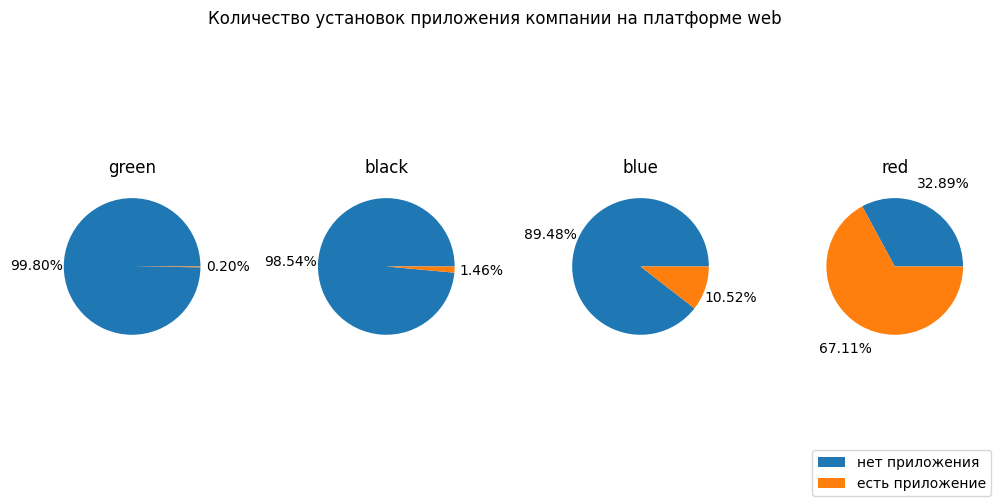

In [ ]:
plots('web')

Проанализировав данные о наличии установки приложения компании на ПК в каждой из 4х компаний, можно сделать следующие выводы:
    
- Больше всего установок в компании Red - 67%
    
- Меньше всего установок в компании Green - 0.2%

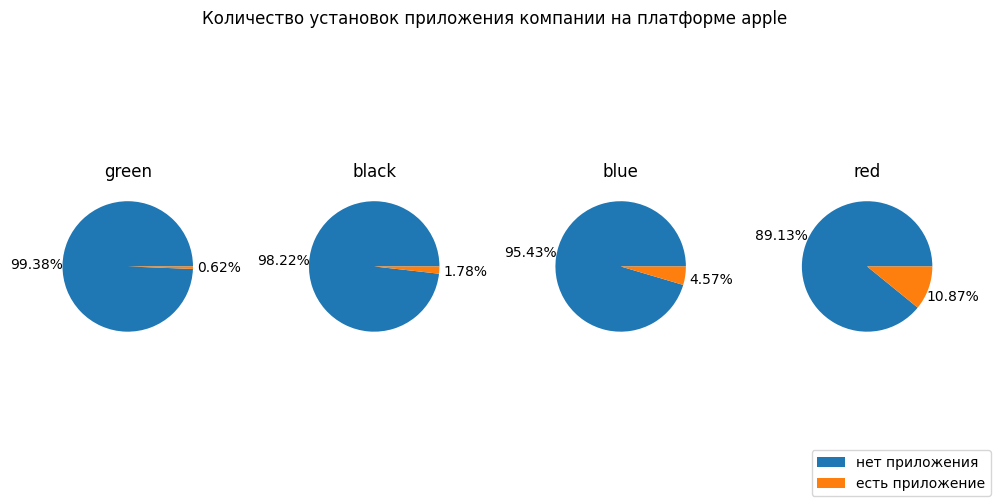

In [ ]:
plots('apple')

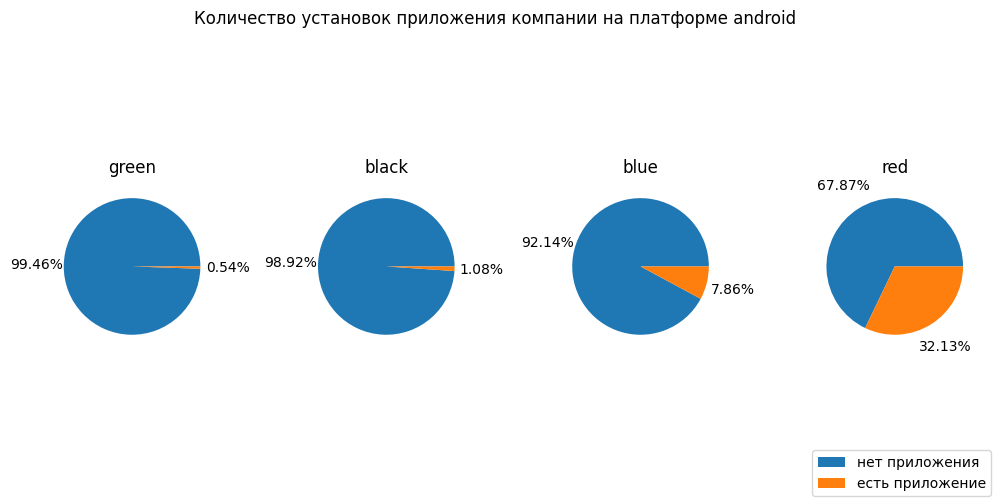

In [ ]:
plots('android')

Ситуация повторяется и по отношению к платформам apple  и android.
    
- В компании Red по-прежнему наибольшее кол-во скачиваний, в Green - меньше всего.
    
- В компании Red и Blue - больше всего скачиваний на web, меньше всего на apple. В компании Black  больше всего скачиваний на apple, меньше всего на android.
    
- Green имеет больше установок на apple, меньше всего на web.

In [ ]:
def plots_id(col):

        companies_1 = [green, black, blue]
        names = ['green', 'black', 'blue']

        for company in companies_1:
            for column in company.columns:
                if col in column:
                    company = company.rename(columns={column: col}, inplace=True)

        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
        fig.suptitle(f'Наличие зарегистрированного аккаунта в компании', fontsize=12)

        for i, table in enumerate(companies_1):
            axes[i].pie(table[col].astype(float).value_counts(), autopct='%1.2f%%', pctdistance=1.4)
            axes[i].set_title(f'{names[i]}')

        labels = [f"не зарегистрирован", f"зарегистрирован"]
        fig.legend(labels=labels, loc='lower right')
        fig.tight_layout()


        return plt.show()

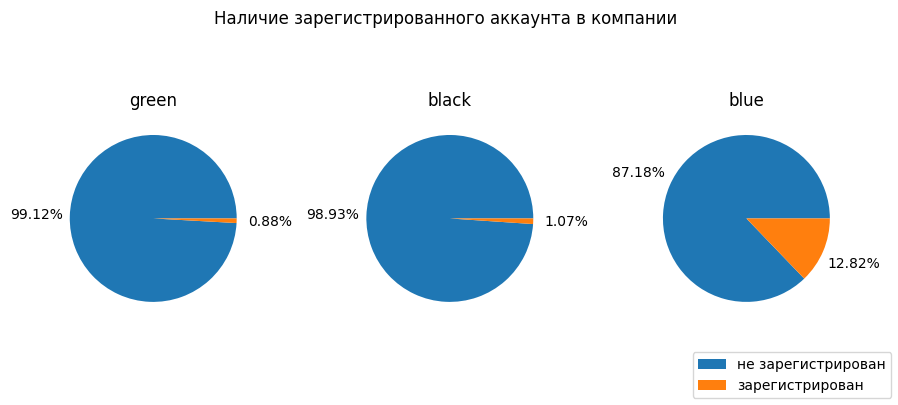

In [ ]:
plots_id('has')

По компании Red отсутствуют данные по соответствующему столбцу, поэтому анализируем по 3м компаниям. Больше всего зарегестрированных аккаунтов имеет компания Blue, меньше всего по-прежнему Green .

Суммарный gmv пользователя в сервисе


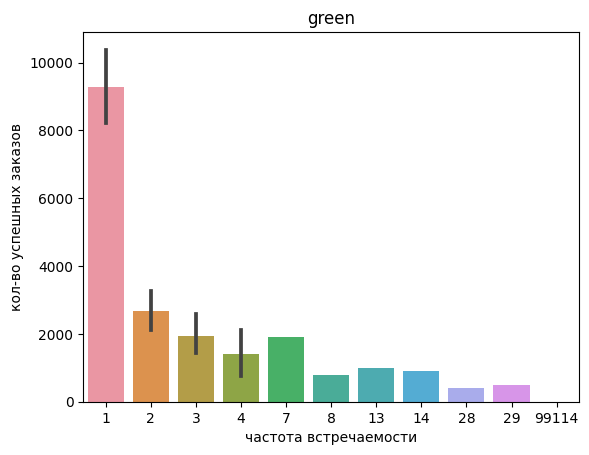

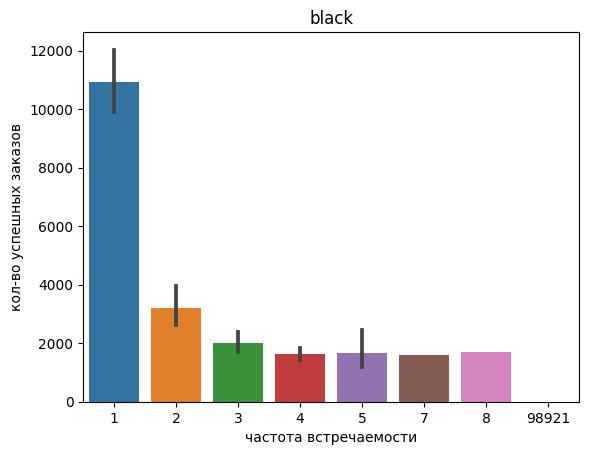

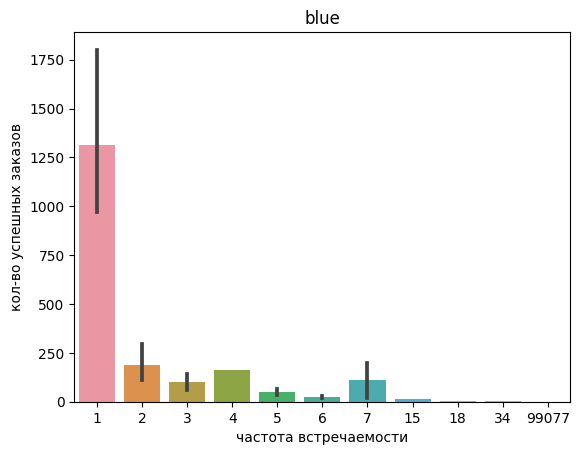

In [ ]:
companies = [green, black, blue]
names = ['green', 'black', 'blue']

for company in companies:
    for column in company.columns:
        if 'gmv_total' in column:
            company = company.rename(columns={column: 'gmv_total'}, inplace=True)

print ('\033[1m' + 'Суммарный gmv пользователя в сервисе')


for i, table in enumerate(companies):
    counts = table['gmv_total'].value_counts()
    sns.barplot(x = counts.values, y = counts.index).set_title(f'{names[i]}')
    plt.ylabel('кол-во успешных заказов')
    plt.xlabel('частота встречаемости')
    plt.show()

Говоря про суммарный gmv пользователя по представленным данным, кроме компании Red, мы видим большое кол-во gmv пользователя = 0. Больших значений очень мало. Знчения gmv по компаниям green, black более-менее схожи и варьируются от 0 до 10 000. В blue иначе.Значения от 0 до 1250, что говорит о том , что совокупная стоимость товаров в этой компании меньше, кроме того кол-во нулевых  gmv здесь выше.

Посмотрим на средние показатели gmv по компаниям.

In [ ]:
black.gmv_total.mean()

94.24497224861243

In [ ]:
green.gmv_total.mean()

59.82145285811433

In [ ]:
blue.gmv_total.mean()

2.349346119437492

Компания Black лидирует по среднему значению gmv пользователя, наименьшие показатели в компании Blue. Разница средних показателей колоссальна и варьируется от 2.3 до 94.2. Что говорит о разном положении компаний на рынке. Компания Blue явно отстает от Black и Green, которая занимает среднее место по этому показателю.

Количество активных действий пользователя в сервисе


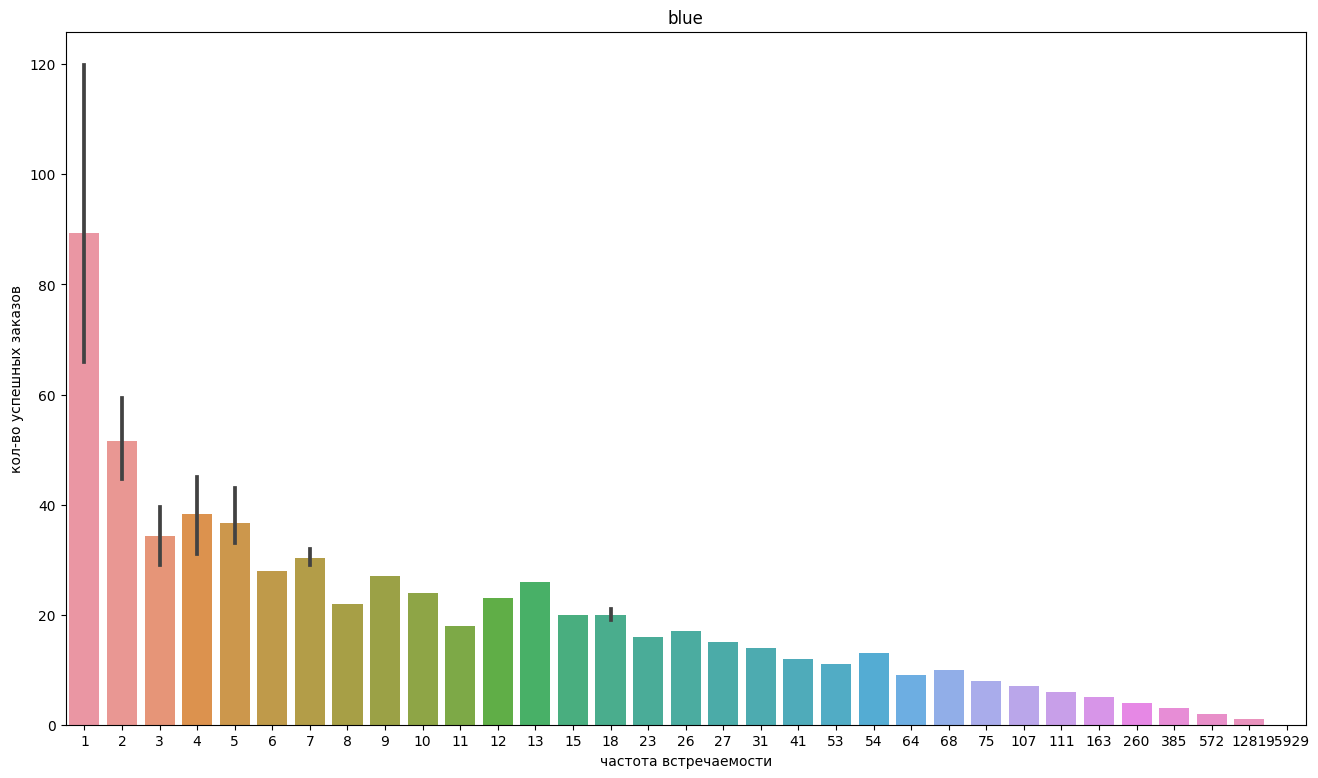

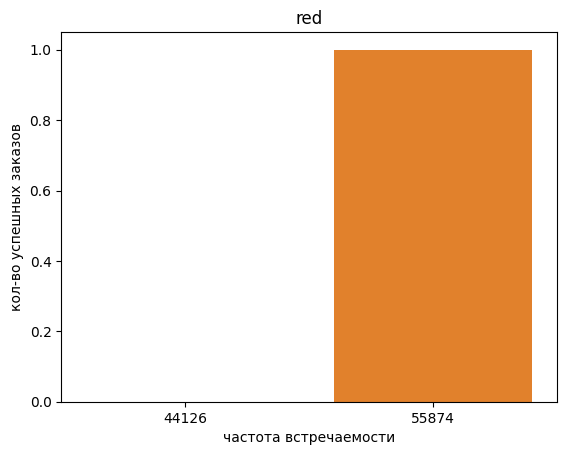

In [ ]:
companies2 = [blue, red]
names2 = ['blue', 'red']

for company in companies2:
    for column in company.columns:
        if 'activity_count' in column:
            company = company.rename(columns={column: 'activity_count'}, inplace=True)

print ('\033[1m' + 'Количество активных действий пользователя в сервисе')
plt.figure(figsize = (16,9))
for i, table in enumerate(companies2):
    counts = table['activity_count'].astype(int).value_counts()
    sns.barplot(x = counts.values, y = counts.index).set_title(f'{names2[i]}')
    plt.ylabel('кол-во успешных заказов')
    plt.xlabel('частота встречаемости')
    plt.show()

In [ ]:
blue.activity_count.mean()

0.19139953559904707

In [ ]:
red.activity_count.mean()

0.55874

Данные по активным действия пользователей представлены только по 2-м компаниям. В Blue  мы видим широкий спектр кол-ва активных действий пользователей, когда в Red  действие либо активное, либо нет. В компании red больше активных действий, чем неактивных. В компании Blue  мы видим, что активные действия в основном не превышают 10 шт, далее - более редкие случаи. Несмотря на большой разброс, в Blue все равно в среднем кол-во активных действий 2, когда в Red при округлении -  1.

In [ ]:
companies3 = [green, black]
names3 = ['green', 'black']

for company in companies3:
    for column in company.columns:
        if 'order_count' in column:
            company = company.rename(columns={column: 'order_count'}, inplace=True)

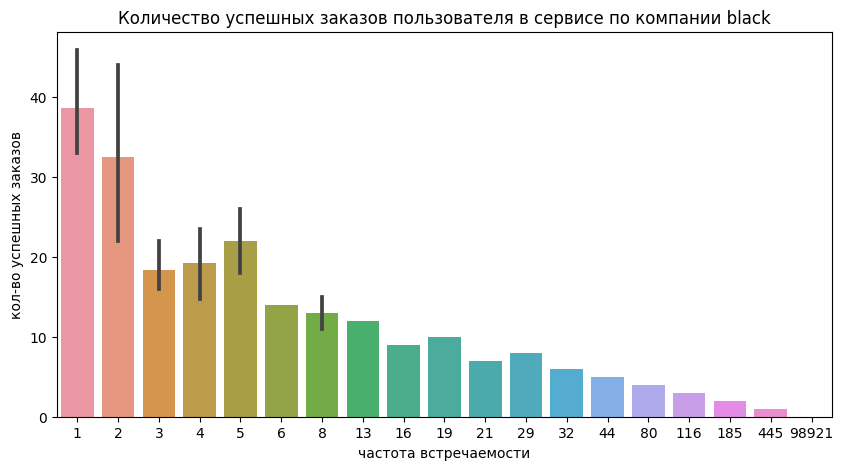

In [ ]:
counts_black = black['order_count'].value_counts()
plt.figure(figsize = (10,5))
sns.barplot(x = counts_black.values, y = counts_black.index).set_title(f'{names3[i]}')
plt.title('Количество успешных заказов пользователя в сервисе по компании black')
plt.ylabel('кол-во успешных заказов' )
plt.xlabel('частота встречаемости' )
plt.show()

In [ ]:
counts_black.astype(int).loc [ lambda x : x != 0].count()/counts_black.shape[0]

1.0

Большую долю опять составляют нули, далее наибольше кол-во успешных заказов = 1. Кол-во успешных заказов обычно доходит до 8, далее - реже.

In [ ]:
green.order_count.value_counts()

0.0     99114
1.0       238
2.0       123
4.0        81
3.0        70
        ...  
45.0        1
62.0        1
49.0        1
21.0        1
60.0        1
Name: order_count, Length: 69, dtype: int64

In [ ]:
green_success = green[green.order_count != '0.0'].order_count.value_counts().astype(int)
green_success

1.0     238
2.0     123
4.0      81
3.0      70
5.0      48
       ... 
45.0      1
62.0      1
49.0      1
21.0      1
60.0      1
Name: order_count, Length: 68, dtype: int64

По компании Green слишком много значений, поэтому построить график будет трудно. Мы видим, что кол-во нулей преобладает и составляет большую часть, то есть кол-во успешных заказов в основном равно 0. Рассмотрим на графике кол-во успешных заказов больше 0.

In [ ]:
green_success.loc [ lambda x : x == 1].count()/green.order_count.shape[0]

0.00034001360054402175

Единичные случаи тоже исключим, тем более они составляют менее 1 процента данных.

In [ ]:
green_success = green_success.loc [ lambda x : x > 1]

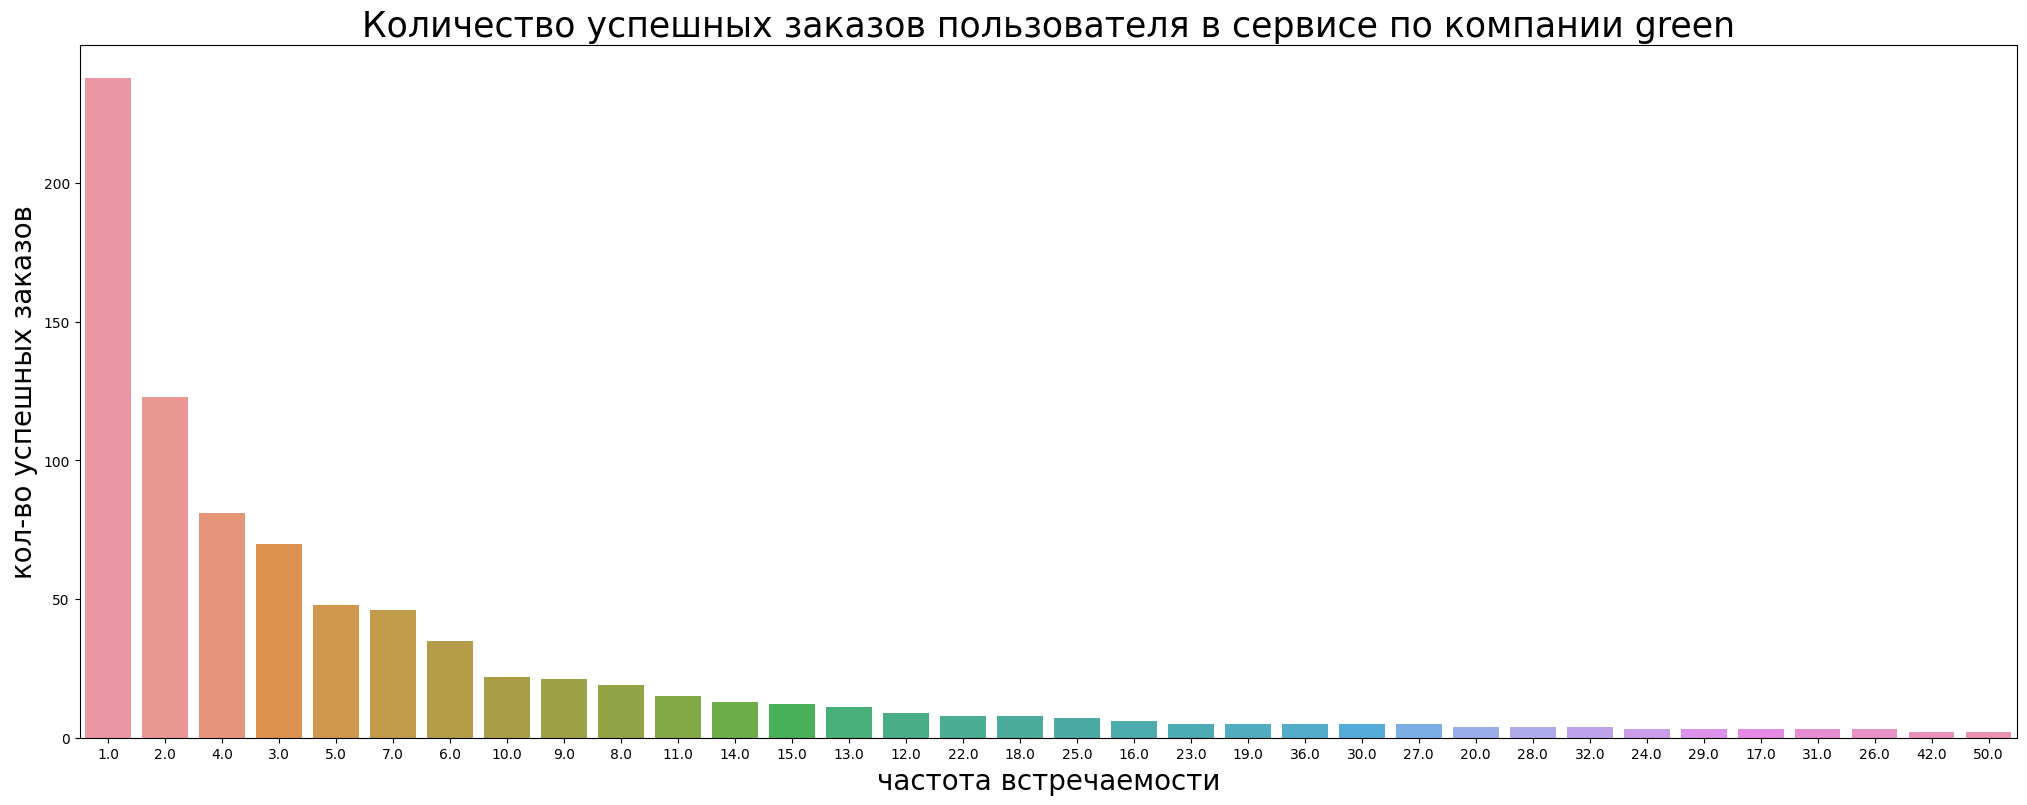

In [ ]:
plt.figure(figsize = (25,9))
plt.title('Количество успешных заказов пользователя в сервисе по компании green', fontsize=25)
sns.barplot(x = green_success.index, y = green_success.values)
plt.ylabel('кол-во успешных заказов', fontsize=20 )
plt.xlabel('частота встречаемости', fontsize=20 )
plt.show()

В компании Green ситуация идентична: большую долю опять составляют нули, далее наибольше кол-во успешных заказов = 1. В основном, успешные заказы пользователя доходят до 15 шт, дальше - наиболее редкие результаты.

Посмотрим, сколько пользователей одновременно имеют аккаунт в 3х компаниях (т.к. о компании red такой информации нет)

In [ ]:
for col in data.columns:
    if 'has' in str(col):
        data[col] = pd.to_numeric(data[col])

In [ ]:
has_account = data[(data['has_black_id'] == 1) & (data['has_green_id'] == 1) & (data['has_blue_id'] == 1)]
len(has_account)

21

Всего 21 пользователь имеет зарегистрированный аккаунт одновременно в 3х компаниях.

In [ ]:
all_companies = [red,blue,black,green]
names = ['red','blue','black','green']

for name,company in enumerate(all_companies):
    lens = len(company[(company['android'] == '1.0') & (company['web'] == '1.0') & (company['apple'] == '1.0')])
    print(f'Кол-во пользователей в компании {names[name]}, которые одновременно используют все каналы: web, apple, android  в компании {lens}')

Кол-во пользователей в компании red, которые одновременно используют все каналы: web, apple, android  в компании 2415
Кол-во пользователей в компании blue, которые одновременно используют все каналы: web, apple, android  в компании 76
Кол-во пользователей в компании black, которые одновременно используют все каналы: web, apple, android  в компании 4
Кол-во пользователей в компании green, которые одновременно используют все каналы: web, apple, android  в компании 1


Мы видим, что в компании red больше всего тех пользователей, которые одновременно используют все каналы коммуникации, в компании Green всего 1 такой пользователь, в компании Black - 4. По результатам анализа компаний выше мы сделали вывод о том, что в компании Red больше всего пользователей, у которых есть приложение компании на разных платформах, кроме того 2415 имеют одновременно приложения на всех представленных платформах. Зачем им это нужно? Может, компания таким образом обязала всех своих сотрудников установить приложение на всех возможных девайсах, и у всех оказались android, apple и ПК. Это может показаться странным. Скорее всего, здесь другая причина.

**3. Статистический анализ**

**Логистическая регрессия**: Проведем логистическую регрессию, чтобы определить, какие факторы, такие как наличие зарегистрированного аккаунта или установленного приложения, оказывают наибольшее влияние на проживание в Москве.

In [ ]:
def regression(company):
    company = company.drop('hid', axis = 1)
    company = company.astype(float)

    Y = company['is_msk']
    X = company[['has', 'apple', 'android', 'web']]

    X = sm.add_constant(X, prepend=False)

    model = sm.Logit(Y, X)
    result = model.fit()


    return print(result.summary())

In [ ]:
regression(blue)

Optimization terminated successfully.
         Current function value: 0.360370
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 is_msk   No. Observations:                99483
Model:                          Logit   Df Residuals:                    99478
Method:                           MLE   Df Model:                            4
Date:                Wed, 24 May 2023   Pseudo R-squ.:                 0.01225
Time:                        18:32:19   Log-Likelihood:                -35851.
converged:                       True   LL-Null:                       -36295.
Covariance Type:            nonrobust   LLR p-value:                3.995e-191
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
has            0.1913      0.028      6.779      0.000       0.136       0.247
apple          0.8770      0.

По результатам проведения логистической регрессии по компании Blue мы видим, что наибольшее влияние на проживание в Москве оказывает наличие приложения на платформе Apple, затем идут приложения на платформе Android и на веб-платформе. Наличие аккаунта оказывает наименьшее влияние на проживание в Москве.

In [ ]:
regression(green)

Optimization terminated successfully.
         Current function value: 0.344388
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 is_msk   No. Observations:                99996
Model:                          Logit   Df Residuals:                    99991
Method:                           MLE   Df Model:                            4
Date:                Wed, 24 May 2023   Pseudo R-squ.:                 0.05719
Time:                        18:32:20   Log-Likelihood:                -34437.
converged:                       True   LL-Null:                       -36526.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
has            2.4632      0.090     27.358      0.000       2.287       2.640
apple          3.3616      0.

По результатам проведения логистической регрессии по компании Green мы видим, что наибольшее влияние на проживание в Москве опять оказывает наличие приложения на платформе Apple, затем идут приложения на платформе Android и на веб-платформе. Наличие аккаунта оказывает наименьшее влияние на проживание в Москве, но большее, чем в предыдущей компании.

In [ ]:
regression(black)

Optimization terminated successfully.
         Current function value: 0.358768
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 is_msk   No. Observations:                99995
Model:                          Logit   Df Residuals:                    99990
Method:                           MLE   Df Model:                            4
Date:                Wed, 24 May 2023   Pseudo R-squ.:                 0.01804
Time:                        18:32:21   Log-Likelihood:                -35875.
converged:                       True   LL-Null:                       -36534.
Covariance Type:            nonrobust   LLR p-value:                3.399e-284
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
has            0.7862      0.073     10.803      0.000       0.644       0.929
apple          1.0950      0.

По результатам проведения логистической регрессии по компании Black мы видим, что наибольшее влияние на проживание в Москве  оказывает наличие приложения на платформе web, затем идет платформа apple и наличие зарегистрированного аккаунта, меньшее влияние на проживание в Москве пользователей компании Black оказывает наличие приложения на платформе android.

**4. Общий вывод**

Таким образом, по приведенным данным можно сделать следующие выводы:

- Данные по компаниям представлены неполно (не для всех компаний есть данные об активных пользователях, информации по gmv и тд)


- По компании Red представлено меньше всего данных (меньше всего столбцов)


- Компания Green отличается наименьшим количеством зарегистрированных аккаунтов и установленных приложений на представленных платформах по сравнению с другими компаниями


- Компания Red  отличается тем, что в ней наибольшее кол-во пользователей с установленными приложениями компании на всех представленных платформах. Кроме того, кол-во активных действий ограничивается 1 (это может объясняться тем, что клиент заходит на сайт, не находит нужной информации и больше не возвращается. Это может быть обусловлено неправильной настроенной таргетированной рекламой), когда у компании Black достигает выше 80ти. Это говорит о низкой активности в компании Red.


- В данных по gmv  в каждой компании превалируют значения равные 0. gmv отражает активность на торговой площадки — чем выше показатель, тем выше ожидаются доходы. В данном случае можно говорить о низкой активности на торговых площадках компаний


- Говоря про кол-во успешных заказов, также стоит отметить превалирущее кол-во нулей. Это может говорить также о низкой активности в компаниях или о тех.сбоях.


- Распределение пользователей по Москве из каждой компании примерно одинаково. Преобладают пользователи из Москвы, и в каждой компании их кол-во составляет 88%, остальные располагаются в других регионах. Кроме того на проживание в Москве оказывают влияние некоторые факторы: для компаний Green  и Blue - это наличие установленных приложений на платформе apple, для компании Black - на web.


- Средний показатель gmv наибольший у компании Black. Следовательно, ее положение на рынке по уровню дохода и активности выше, чем у других.
